# EDA - Exploratory Data Analysis

In this notebook, we will perform exploratory data analysis on the dataset to understand its structure, identify patterns, and detect any anomalies.
we will be using already defined functions from the utils folder.

## 0. Utils folder path setup for imports

Before we start we need to add the utils folder to the system path so that we can import the functions defined there.

In [ ]:
import sys
from pathlib import Path as pth
import gc

# Add the utils folder to the system path
project_root = pth.cwd().parent # Should go from ML_Project/notebooks to ML_Project

sys.path.insert(0,str(project_root))

print("Utils folder added to system path for imports.")

## 1. Importing Libraries
this cell imports all the necessary libraries and functions for data analysis and visualization.

In [2]:
from utils.preprocessing import load_rating_data, load_movies_data, merge_datasets, process_movie_genres
from utils.visualization import plot_genre_counts, plot_popularity_vs_average, plot_rating_counts, plot_user_activity

## 2. Load Datasets

We will load the movies and ratings datasets using the preprocessing functions defined in the utils folder.

we will reference the data files using pathlib for os independence.

In [3]:
# Declaring the 1M dataset file paths
ratings_1m_path = pth.cwd().parent / 'data' / 'ml-1m' / 'ratings.dat'
movies_1m_path = pth.cwd().parent / 'data' / 'ml-1m' / 'movies.dat'

# Declaring the 100K dataset file paths
ratings_100k_path = pth.cwd().parent / 'data' / 'ml-latest-small' / 'ratings.csv'
movies_100k_path = pth.cwd().parent / 'data' / 'ml-latest-small' / 'movies.csv'

# Making sure the files exist
if not ratings_1m_path.exists() or not movies_1m_path.exists():
    print("1M dataset files not found. Please ensure the files are in the correct directory.")
if not ratings_100k_path.exists() or not movies_100k_path.exists():
    print("100K dataset files not found. Please ensure the files are in the correct directory.")

# Load the 1M dataset
ratings_1m = load_rating_data(ratings_1m_path,'dat')
movies_1m = load_movies_data(movies_1m_path,'dat')
merged_1m = merge_datasets(movies_1m, ratings_1m)

# Load the 100K dataset
ratings_100k = load_rating_data(ratings_100k_path, 'csv')
movies_100k = load_movies_data(movies_100k_path, 'csv')
merged_100k = merge_datasets(movies_100k, ratings_100k)

In [4]:
# Making sure the 1M datasets are loaded correctly
print("1M Rating Dataset Sample:")
merged_1m.head()

1M Rating Dataset Sample:


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [5]:
# Making sure the 100K datasets are loaded correctly
print("100K Dataset Sample:")
merged_100k.head()

100K Dataset Sample:


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


### 2.1 Memory cleanup to save up memory

since we are working with large datasets, it is important to clean up memory after loading and preprocessing the datasets.
this is helpful to avoid memory overflow issues during analysis, training or visualization later on.

In [6]:
# Cleaning the memory space used by the individual datasets to save up memory for the 1M dataset
del ratings_1m
del movies_1m
del ratings_1m_path
del movies_1m_path
# Cleaning the memory space used by the individual datasets to save up memory for the 100K dataset
del ratings_100k
del movies_100k
del ratings_100k_path
del movies_100k_path
# Calling garbage collector to free up memory
gc.collect()

18

## 3. Data Exploration and Visualization

Now that we have loaded and preprocessed the datasets, we can perform exploratory data analysis (EDA) to understand the data better.
We will create various plots to visualize the data distributions and relationships.

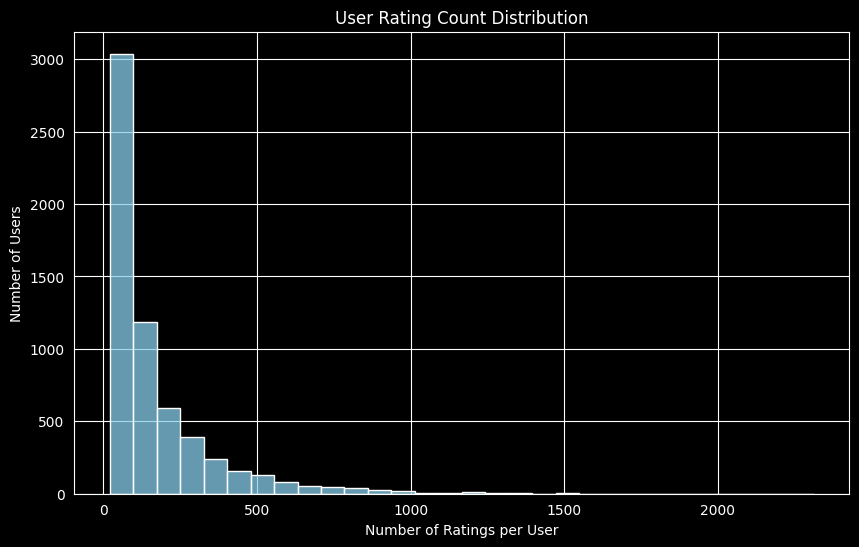

In [7]:
# Plot to show the distribution of the amount of ratings per user in the 1M dataset
plot_user_activity(merged_1m)

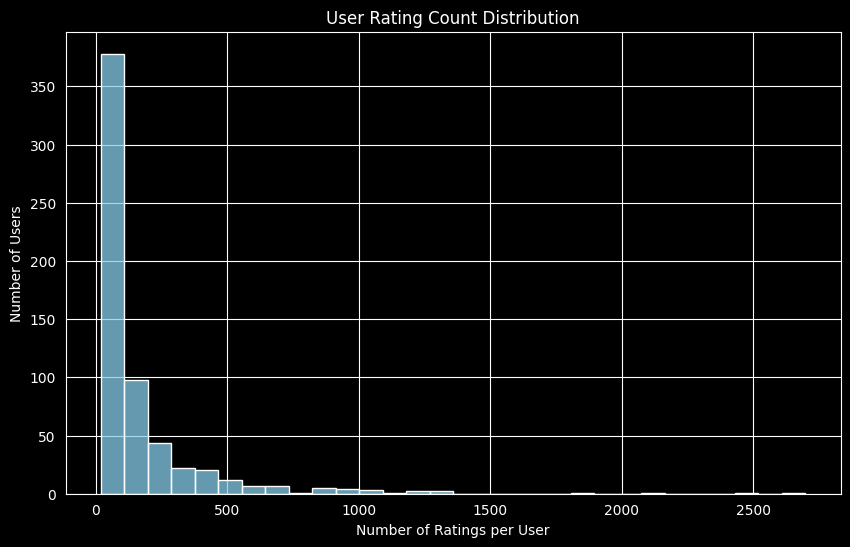

In [8]:
# Plot to show the distribution of the amount of ratings per user in the 100K dataset
plot_user_activity(merged_100k)

/home/fedora/Desktop/Labs/ML_Labs/ML_Project/utils/visualization.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='magma')


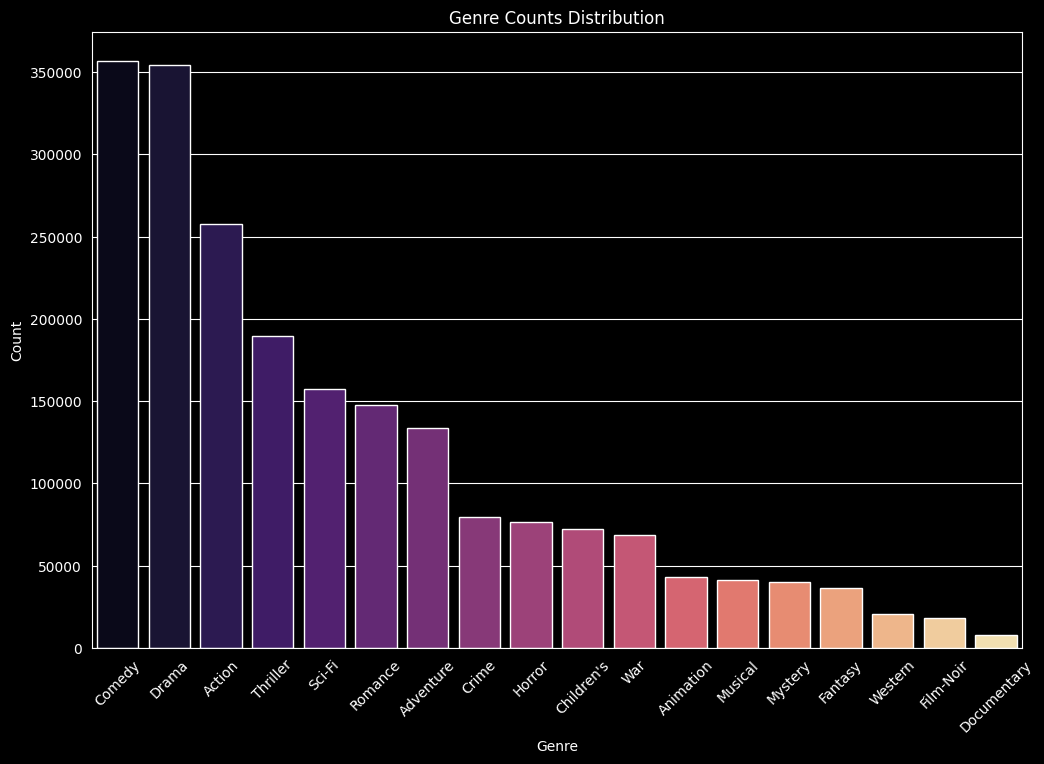

In [9]:
# Plot to show the distribution of genres in the 1M dataset
plot_genre_counts(process_movie_genres(merged_1m, "genres"))

/home/fedora/Desktop/Labs/ML_Labs/ML_Project/utils/visualization.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='magma')


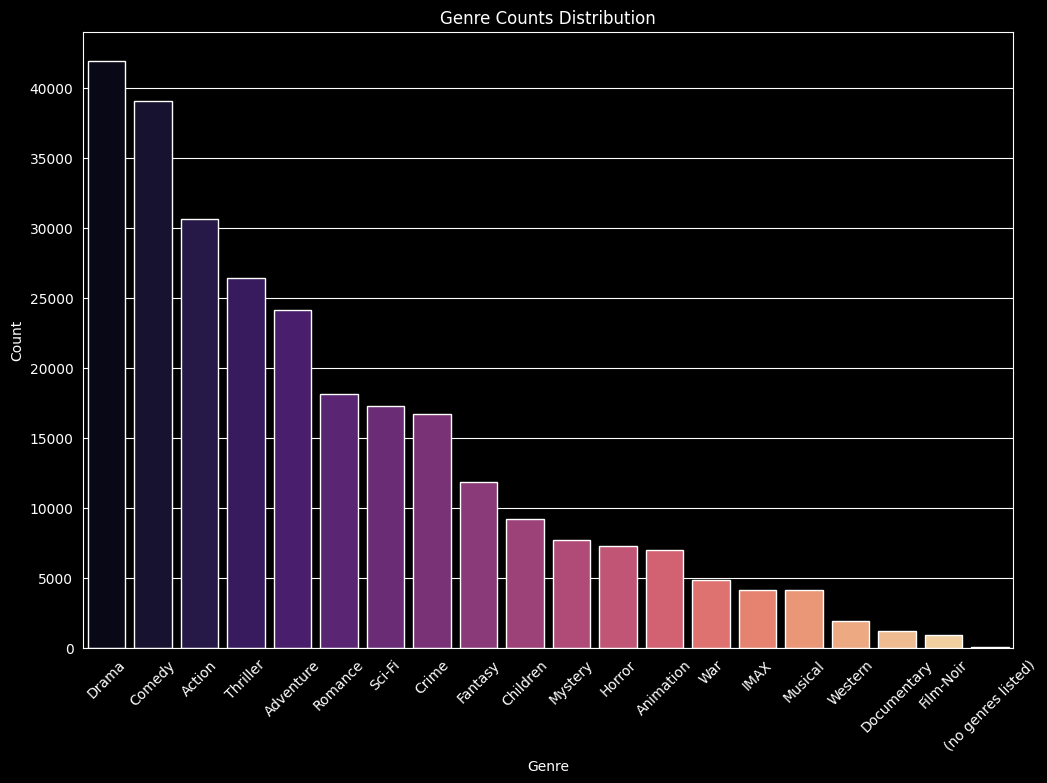

In [10]:
# Plot to show the distribution of genres in the 100K dataset
plot_genre_counts(process_movie_genres(merged_100k, "genres"))

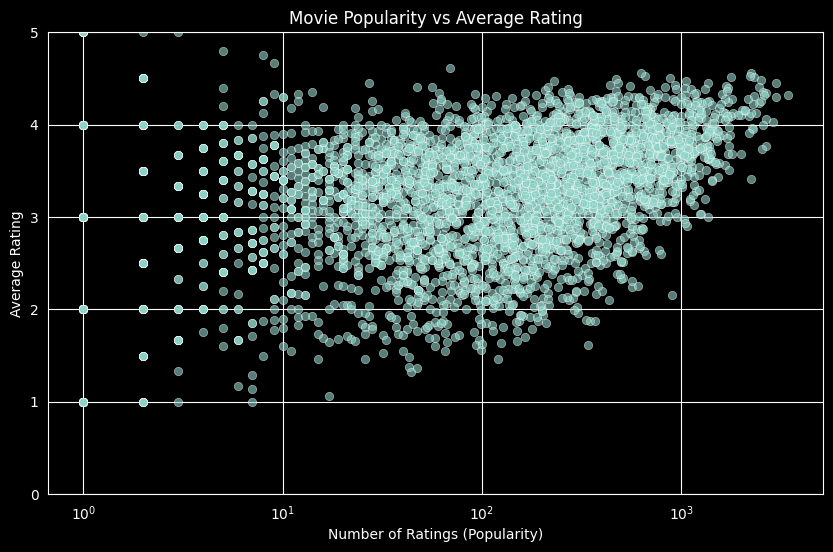

In [11]:
# Plot to show the relationship between popularity and average rating in the 1M dataset
plot_popularity_vs_average(merged_1m)

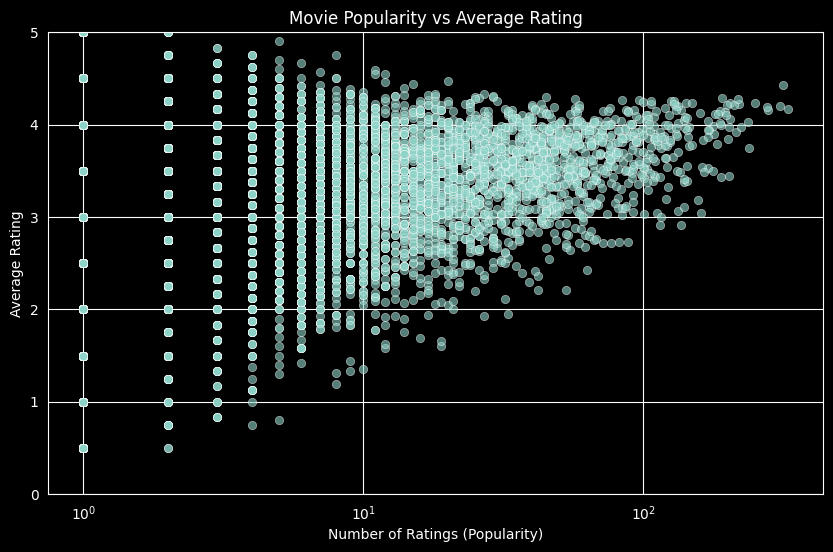

In [12]:
# Plot to show the relationship between popularity and average rating in the 100k dataset
plot_popularity_vs_average(merged_100k)

/home/fedora/Desktop/Labs/ML_Labs/ML_Project/utils/visualization.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


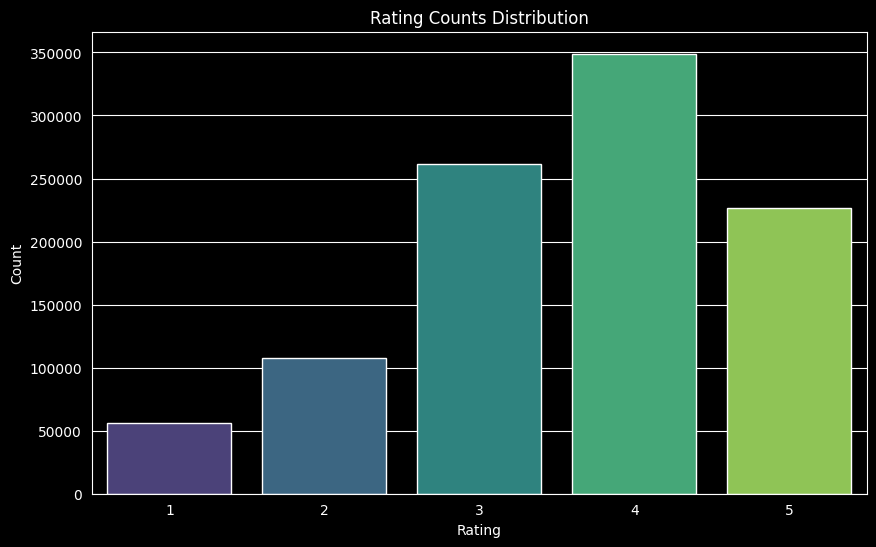

In [13]:
# Plot to show the distribution of ratings in the 1M dataset
plot_rating_counts(merged_1m)

/home/fedora/Desktop/Labs/ML_Labs/ML_Project/utils/visualization.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


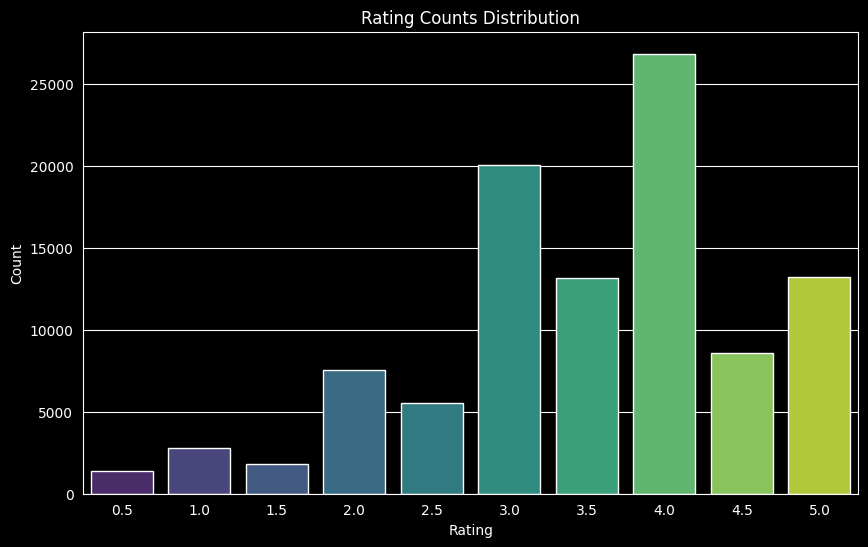

In [14]:
# Plot to show the distribution of ratings in the 100K dataset
plot_rating_counts(merged_100k)

## 4. Final Cleanup

After completing the EDA, we will clean up the memory used for better resource management.

In [15]:
# Cleaning up the memory used by the merged datasets
del merged_1m
del merged_100k
# Cleaning up any other variables that are no longer needed
del project_root
# Calling garbage collector to free up memory
gc.collect()

1988

## 5. Jupiter notebook shutdown

This cell will be responsible for shutting down the Jupyter notebook server after the notebook execution is complete.
This is useful for automated workflows where we want to ensure that resources are freed up after the notebook has finished running.

In [16]:
import IPython

print("Shutting down the Jupyter notebook kernel for this notebook...")
IPython.get_ipython().kernel.do_shutdown(restart=False)

Shutting down the Jupyter notebook kernel for this notebook...


{'status': 'ok', 'restart': False}

## 6. Conclusion

This is the end of the EDA notebook.
In this notebook, we loaded the datasets, performed exploratory data analysis, and visualized various aspects of the data to gain insights.
Refer to the 02_data_preparation.ipynb notebook for the next steps in data preparation for model training.